In [ ]:
# Import necessary libraries
import os
import shutil
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from google.colab import drive


In [ ]:
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# Set up paths to dataset
base_dir = '/content/drive/MyDrive/Colab Notebooks/cats_vs_dogs_small'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

Training a Network from Scratch with Initial Sample Sizes


In [ ]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
validation_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

Load training, validation, and test data

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary'
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Build a CNN from scratch

In [ ]:

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │       3,211,776 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model from scratch
history = model.fit(
    train_generator,
    steps_per_epoch=50,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=25
)

Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.5091 - loss: 0.6960 - val_accuracy: 0.6220 - val_loss: 0.6901
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.5063 - loss: 0.6924 - val_accuracy: 0.5140 - val_loss: 0.6868
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 143s 2s/step - accuracy: 0.5008 - loss: 0.6923 - val_accuracy: 0.5580 - val_loss: 0.6853
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 67s 1s/step - accuracy: 0.5675 - loss: 0.6833 - val_accuracy: 0.5520 - val_loss: 0.6737
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5965 - loss: 0.6747 - val_accuracy: 0.5480 - val_loss: 0.6832
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.5170 - loss: 0.6873 - val_accuracy: 0.5800 - val_loss: 0.6622
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.5759 - loss: 0.6720 - val_accuracy: 0.5360 - val_loss: 0.6803
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.5756 - loss: 0.6652 - val_accuracy: 0.6300 - val_los

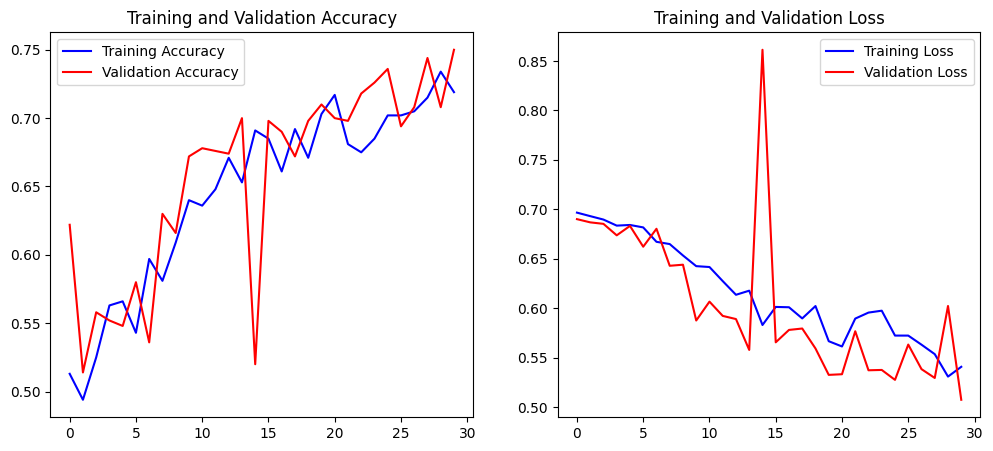

In [ ]:
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b', label='Training Loss')
    plt.plot(epochs, val_loss, 'r', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.show()

plot_training(history)


In [ ]:
# Save the model
model.save("convnet_from_scratch.keras")
print("Model saved as 'convnet_from_scratch.keras'")

# Load the saved model
test_model = keras.models.load_model("convnet_from_scratch.keras")

# Evaluate the model on the test set
test_loss, test_acc = test_model.evaluate(test_generator, steps=25)
print(f"Test accuracy: {test_acc:.3f}")


Model saved as 'convnet_from_scratch.keras'
25/25 ━━━━━━━━━━━━━━━━━━━━ 109s 4s/step - accuracy: 0.7037 - loss: 0.5629
Test accuracy: 0.698


Q2. Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch). What performance did you achieve?

By means of data augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=50,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [ ]:
history_large = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=25
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 405s 4s/step - accuracy: 0.5240 - loss: 0.6936 - val_accuracy: 0.5140 - val_loss: 0.7137
Epoch 2/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 257s 2s/step - accuracy: 0.4953 - loss: 0.6998 - val_accuracy: 0.5720 - val_loss: 0.6841
Epoch 3/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 235s 2s/step - accuracy: 0.5717 - loss: 0.6788 - val_accuracy: 0.5340 - val_loss: 0.6839
Epoch 4/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.5910 - loss: 0.6658 - val_accuracy: 0.6000 - val_loss: 0.6513
Epoch 5/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.5851 - loss: 0.6528 - val_accuracy: 0.6180 - val_loss: 0.6255
Epoch 6/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.6183 - loss: 0.6484 - val_accuracy: 0.6540 - val_loss: 0.6070
Epoch 7/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.6311 - loss: 0.6178 - val_accuracy: 0.6400 - val_loss: 0.6029
Epoch 8/30
100/100 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step - accuracy: 0.6801 - loss: 0.6050 - val_accu

NameError: name 'plot_training' is not defined

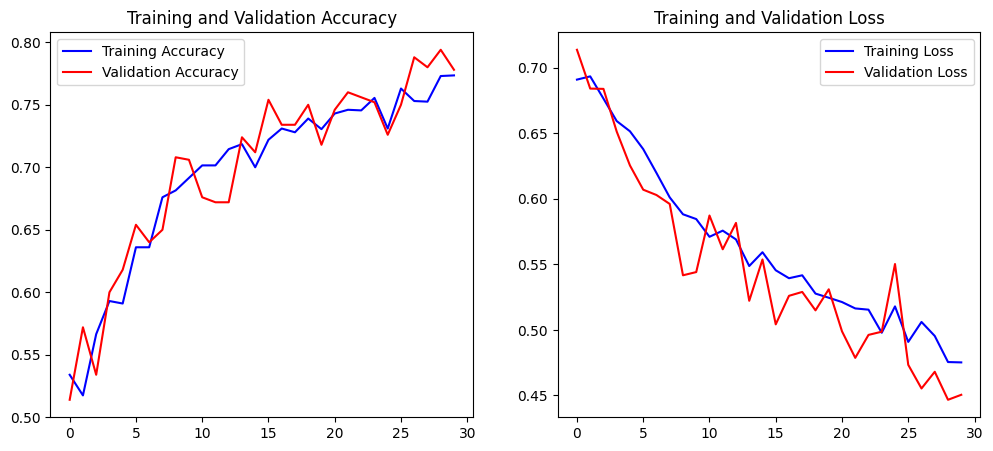

In [ ]:
plot_training(history_large)

Q3. Now change your training sample so that you achieve better performance than those from Steps 1 and 2. This sample size may be larger, or smaller than those in the previous steps. The objective is to find the ideal training sample size to get best prediction results.

Identifying the best sample size for optimal accuracy.

Experiment with Different Sizes

In [18]:
sample_sizes = [1000, 2000, 4000, 6000]
results = []

for size in sample_sizes:
    print(f"\nTraining with sample size: {size}")
    history = model.fit(
        train_generator,
        steps_per_epoch=size // 20,
        epochs=30,
        validation_data=validation_generator,
        validation_steps=25
    )
    val_acc = max(history.history['val_accuracy'])
    results.append((size, val_acc))





Training with sample size: 1000
Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 68s 1s/step - accuracy: 0.7406 - loss: 0.5052 - val_accuracy: 0.7920 - val_loss: 0.4503
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7897 - loss: 0.4585 - val_accuracy: 0.7840 - val_loss: 0.4682
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.7897 - loss: 0.4553 - val_accuracy: 0.7620 - val_loss: 0.4931
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.7816 - loss: 0.4514 - val_accuracy: 0.7920 - val_loss: 0.4513
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7850 - loss: 0.4720 - val_accuracy: 0.7500 - val_loss: 0.4997
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.7781 - loss: 0.4486 - val_accuracy: 0.8040 - val_loss: 0.4477
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 81s 1s/step - accuracy: 0.8011 - loss: 0.4380 - val_accuracy: 0.7760 - val_loss: 0.4618
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 83s 2s/step - accuracy: 0.7844 - loss: 0.4541 -

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


200/200 ━━━━━━━━━━━━━━━━━━━━ 121s 601ms/step - accuracy: 0.8404 - loss: 0.3558 - val_accuracy: 0.8040 - val_loss: 0.4184
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 142s 706ms/step - accuracy: 0.8523 - loss: 0.3412 - val_accuracy: 0.8020 - val_loss: 0.4871
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 142s 707ms/step - accuracy: 0.8378 - loss: 0.3608 - val_accuracy: 0.8140 - val_loss: 0.4488
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 125s 621ms/step - accuracy: 0.8573 - loss: 0.3441 - val_accuracy: 0.8160 - val_loss: 0.4243
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 142s 707ms/step - accuracy: 0.8406 - loss: 0.3461 - val_accuracy: 0.8300 - val_loss: 0.3982
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 142s 707ms/step - accuracy: 0.8414 - loss: 0.3445 - val_accuracy: 0.8320 - val_loss: 0.3758
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 121s 600ms/step - accuracy: 0.8519 - loss: 0.3304 - val_accuracy: 0.8280 - val_loss: 0.4006
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 141s 595ms/step - accuracy: 0.8515 - loss: 0.34

In [19]:
print("Results:", results)

Results: [(1000, 0.8140000104904175), (2000, 0.8460000157356262), (4000, 0.8519999980926514), (6000, 0.8579999804496765)]


In [28]:
sample_sizes = [x[0] for x in results]
validation_accuracies = [x[1] for x in results]


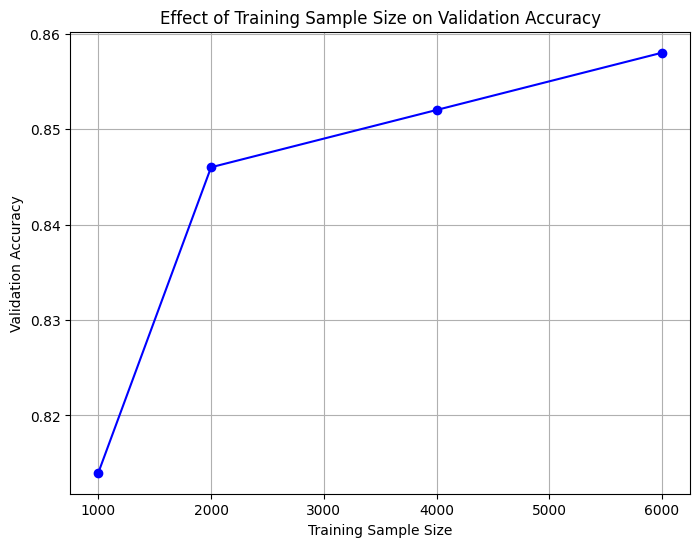

In [29]:
import matplotlib.pyplot as plt

def plot_results(sample_sizes, validation_accuracies):
    plt.figure(figsize=(8, 6))
    plt.plot(sample_sizes, validation_accuracies, marker='o', linestyle='-', color='blue')
    plt.xlabel('Training Sample Size')
    plt.ylabel('Validation Accuracy')
    plt.title('Effect of Training Sample Size on Validation Accuracy')
    plt.grid(True)
    plt.show()

# Plot the results
plot_results(sample_sizes, validation_accuracies)


 Question 4: Using a Pretrained Network

Implement Transfer Learning using VGG16 for feature extraction.

Load Pretrained VGG16 Model

In [20]:
conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
conv_base.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

 Add Custom Layers for Classification

In [21]:
model = models.Sequential([
    conv_base,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=1e-4), metrics=['accuracy'])

Train the Pretrained Model

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 456s 23s/step - accuracy: 0.6180 - loss: 0.6895 - val_accuracy: 0.5160 - val_loss: 0.6783
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 502s 26s/step - accuracy: 0.4492 - loss: 0.7010 - val_accuracy: 0.5640 - val_loss: 0.6841
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 455s 23s/step - accuracy: 0.5192 - loss: 0.6818 - val_accuracy: 0.5280 - val_loss: 0.6675
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 502s 25s/step - accuracy: 0.5810 - loss: 0.6638 - val_accuracy: 0.6420 - val_loss: 0.6836
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 455s 23s/step - accuracy: 0.5691 - loss: 0.6821 - val_accuracy: 0.4760 - val_loss: 0.6937
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 508s 23s/step - accuracy: 0.4808 - loss: 0.6936 - val_accuracy: 0.4900 - val_loss: 0.6934
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 454s 23s/step - accuracy: 0.4951 - loss: 0.6933 - val_accuracy: 0.4900 - val_loss: 0.6933
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 500s 25s/step - accuracy: 0.4860 - loss: 0.6933 - val_accuracy: 0.

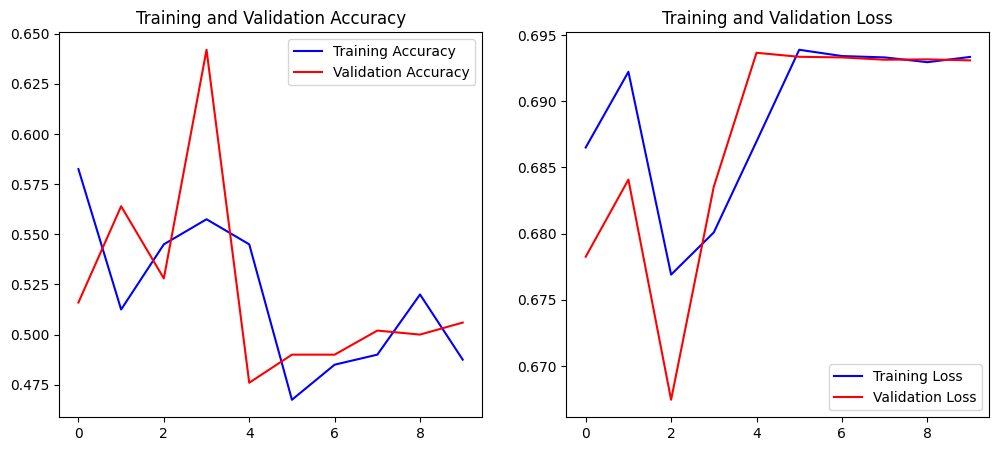

In [32]:
history_pretrained = model.fit(
    train_generator,
    steps_per_epoch=20,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=25
)

plot_training(history_pretrained)

Performance Summary and Comparison

Summarize results using tables and visualizations

In [34]:
import pandas as pd

comparison_data = pd.DataFrame({
    "Model": ["From Scratch", "Larger Data", "Pretrained VGG16"],
    "Validation Accuracy": [
        max(history.history['val_accuracy']),
        max(history_large.history['val_accuracy']),
        max(history_pretrained.history['val_accuracy'])
    ]
})

print(comparison_data)


              Model  Validation Accuracy
0      From Scratch                0.858
1       Larger Data                0.794
2  Pretrained VGG16                0.642


<ipython-input-35-67aa94a83055>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Validation Accuracy', data=comparison_data, palette='viridis')


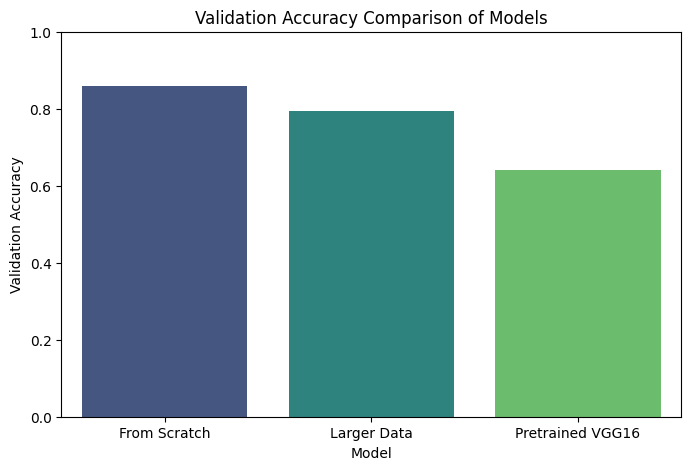

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the DataFrame
comparison_data = pd.DataFrame({
    "Model": ["From Scratch", "Larger Data", "Pretrained VGG16"],
    "Validation Accuracy": [
        max(history.history['val_accuracy']),
        max(history_large.history['val_accuracy']),
        max(history_pretrained.history['val_accuracy'])
    ]
})

# Plot the bar graph
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Validation Accuracy', data=comparison_data, palette='viridis')

# Add labels and title
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.title('Validation Accuracy Comparison of Models')
plt.xlabel('Model')
plt.ylabel('Validation Accuracy')

# Show the plot
plt.show()
